## Data Ingestion

#### Dataset
The primary goal of this project is to build a predictive model that can accurately estimate delivery times for 

e-commerce orders based on various factors such as agent characteristics, geographic distance, time variables, weather 

conditions, traffic, and product categories.

#### Independent Features (Predictors):

* Order_ID: Unique identifier for each order.

* Agent_Age: Age of the delivery agent.

* Agent_Rating: Rating of the delivery agent.

* Store_Latitude/Longitude: Geographic location of the store.

* Drop_Latitude/Longitude: Geographic location of the delivery address.

* Order_Date/Order_Time: Date and time when the order was placed.

* Pickup_Time: Time when the delivery agent picked up the order.

* Weather: Weather conditions during delivery.

* Traffic: Traffic conditions during delivery.

* Vehicle: Mode of transportation used for delivery.

* Area: Type of delivery area (Urban/Metropolitan).

* Category: Category of the product being delivered.

#### Dependent Feature (Target Variable):

* Delivery_Time: Target variable representing the actual time taken for delivery (in hours).


In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/Users/nehadhananju/Desktop/AmazonDeliveryTimePrediction/data/amazon_delivery.csv")

## EDA 

In [3]:
data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [11]:
data.shape

(43739, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
# Checking the null values

data.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [9]:
# Checking the duplicate values

data.duplicated().sum()

0

Text(0.5, 1.0, 'Distribution of Delivery Time')

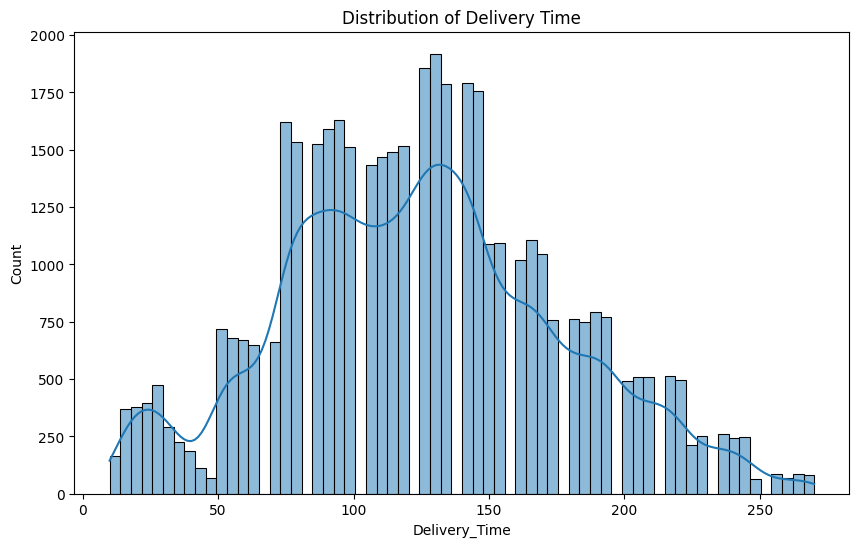

In [13]:
# Check target variable distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery_Time'], kde=True)
plt.title('Distribution of Delivery Time')


Text(0.5, 1.0, 'Corelation heatmap')

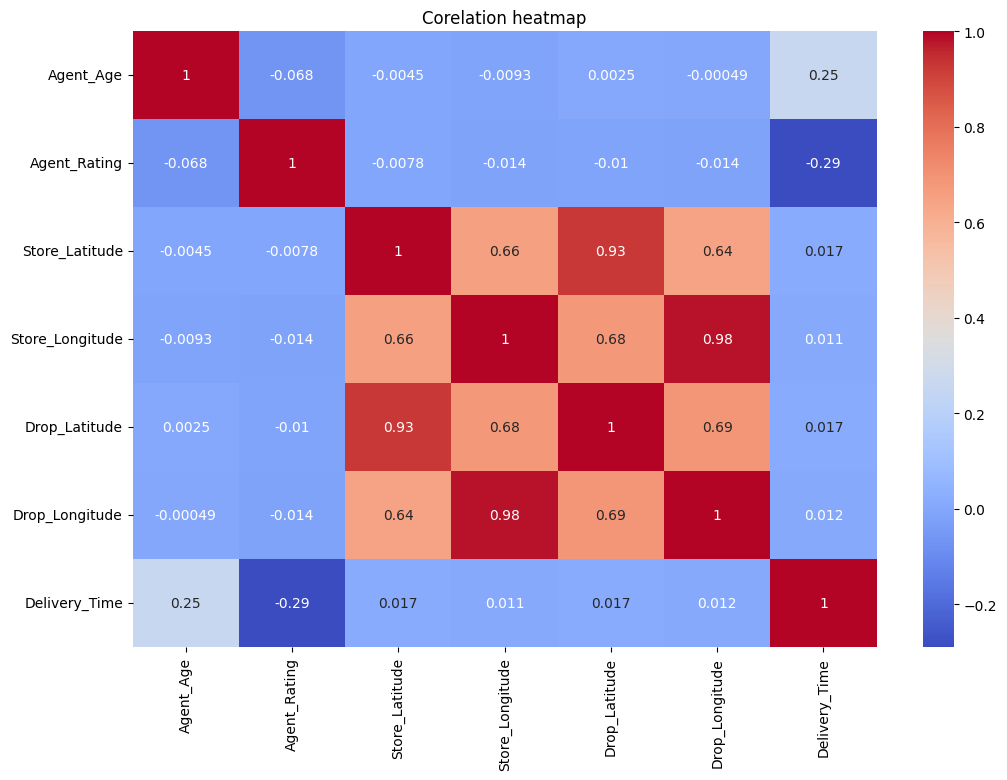

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Corelation heatmap')
